# Часть 1

**id_client** - уникальный id клиента

**id_group** - контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)

**sum_pay** - сумма, на которую была совершена покупка

**id_point** - id торговой точки

**months_reg** - длительность регистрации клиента в программе лояльности

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep=';')

In [3]:
df.head(10)

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
5,1371160,test,218.0,1179.0,5
6,1372110,test,1295.0,1179.0,1
7,1373231,control,4008.0,1179.0,0
8,1372555,test,4708.0,1179.0,9
9,1373288,control,4109.0,1179.0,8


In [4]:
df.tail(10)

,id_client,id_group,sum_pay,id_point,months_reg
10966,1391333,control,2704.0,1182.0,5
10967,1359429,test,3371.0,1178.0,3
10968,1359869,test,6590.0,1178.0,5
10969,1389984,control,1818.0,1182.0,2
10970,1362847,control,2055.0,1178.0,4
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1
10975,1370038,test,5348.0,1179.0,8


In [5]:
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [7]:
df.describe()

,id_client,sum_pay,id_point,months_reg
count,1.097600e+04,10849.000000,10895.000000,10976.000000
mean,1.373018e+06,3568.751037,1180.040385,4.717566
std,1.477359e+04,2927.164583,4.345107,3.185566
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361744e+06,1251.000000,1178.000000,2.000000
50%,1.370690e+06,3173.000000,1179.000000,4.000000
75%,1.373433e+06,5358.000000,1179.000000,7.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [8]:
df.dropna()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


### Задача 1

In [9]:
def statistical_analysis (r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):

#     if (type(r) is not list) and (type(r) is not tuple):
    if (type(r) is not list) & (type(r) is not tuple):
        print('Нужен список или кортеж')
        return
    
    if len(r) <= 4:
        print('Требуется более длинный ряд')
        return

    r = pd.Series(r)
    m = r.mean()
    v = r.var()
    s = r.std()
    
    print('Среднее = ', m)
    print('Дисперсия = ', v)
    print('Стандартное отклонение = ', s)
    
    qs = np.quantile(r,q)
    
    print()
    
    for i in range(len(q)):
        if q[i] == 0.5:
            print('Медиана = ', qs[i])
        elif q[i] == 0.25:
            print('Нижний квартиль  = ', qs[i])
        elif q[i] == 0.75:
            print('Верхний квартиль  = ', qs[i])
        elif q[i] * 100 % 10 == 0:
            print('Дециль ', q[i]*10, ' = ', qs[i])
        else:
            print('Квантиль ', q[i], ' = ', qs[i])
                
    sns.histplot(data = r)
    
    return m, v, s, qs

### Задача 2

In [10]:
def test_calc (r1, r2 , alpha = 0.05):
    
    s,p = ttest_ind(r1, r2)
    
    if p < alpha:
        print('Гипотеза не подтверждается')
    else:
        print ('Гипотеза подтверждается')
        
    print('Среднее первого ряда = ', r1.mean())
    print('Среднее второго ряда = ', r2.mean())
    print('Разность средних = ', r1.mean() - r2.mean())
    print()
    print('Значение стат. критерия = ', s)
    print('Значение p.value = ', p)
    
    return s, p

In [11]:
for i in df.id_point.unique():
    df_loc = df[df['id_point']==i]
    print(i)
    
    r1 = df_loc[df_loc['id_group'] == 'test']['months_reg']
    r2 = df_loc[df_loc['id_group'] == 'control']['months_reg']
    
    test_calc(r1, r2)
    print()

1199.0
Гипотеза подтверждается
Среднее первого ряда =  5.0210084033613445
Среднее второго ряда =  nan
Разность средних =  nan

Значение стат. критерия =  nan
Значение p.value =  nan

1182.0
Гипотеза не подтверждается
Среднее первого ряда =  5.766533066132265
Среднее второго ряда =  5.203307392996109
Разность средних =  0.5632256731361558

Значение стат. критерия =  3.931118290144001
Значение p.value =  8.739466219975628e-05

1178.0
Гипотеза подтверждается
Среднее первого ряда =  4.330286663896967
Среднее второго ряда =  4.407407407407407
Разность средних =  -0.07712074351044063

Значение стат. критерия =  -0.8487135302248066
Значение p.value =  0.3960829678541573

1179.0
Гипотеза подтверждается
Среднее первого ряда =  4.619774011299435
Среднее второго ряда =  4.675302245250432
Разность средних =  -0.05552823395099704

Значение стат. критерия =  -0.5216446482697317
Значение p.value =  0.6019507302046435

nan
Гипотеза подтверждается
Среднее первого ряда =  nan
Среднее второго ряда =  nan

In [12]:
def mann_whitney_func (r1, r2 , alpha = 0.05):
    
    s,p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print ('Распределения равны')
    
    return s, p

# Часть 2

**id_client** - уникальный id клиента

**id_group** - контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)

**sum_pay** - сумма, на которую была совершена покупка

**id_point** - id торговой точки

**months_reg** - длительность регистрации клиента в программе лояльности

In [13]:
df = df.dropna()

In [14]:
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


### Задача 1

In [15]:
statistical_analysis (df['sum_pay'])

Нужен список или кортеж


Среднее =  3568.7580258302582
Дисперсия =  8568932.941996625
Стандартное отклонение =  2927.27397795229

Дециль  1.0  =  410.0
Нижний квартиль  =  1250.75
Дециль  3.0  =  1590.0
Дециль  4.0  =  2329.6000000000004
Медиана =  3173.5
Дециль  6.0  =  3934.0
Верхний квартиль  =  5356.5
Дециль  9.0  =  7088.200000000001


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([ 410.  , 1250.75, 1590.  , 2329.6 , 3173.5 , 3934.  , 5356.5 ,
        7088.2 ]))

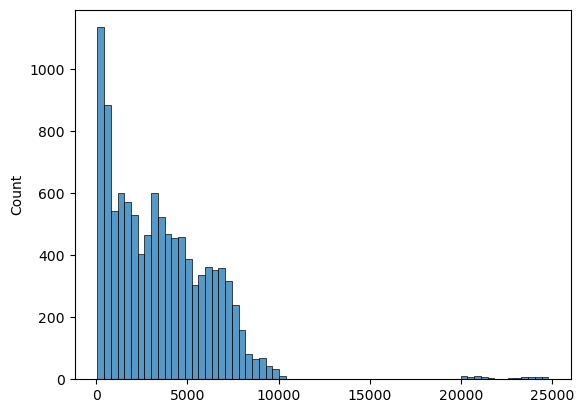

In [16]:
statistical_analysis (list(df['sum_pay']))

Среднее =  3568.7580258302582
Дисперсия =  8568932.941996625
Стандартное отклонение =  2927.27397795229

Квантиль  0.991  =  9934.041000000005
Квантиль  0.992  =  10059.456000000006
Квантиль  0.993  =  20089.762000000002
Квантиль  0.994  =  20574.708000000013
Квантиль  0.995  =  21046.075000000004


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([ 9934.041, 10059.456, 20089.762, 20574.708, 21046.075]))

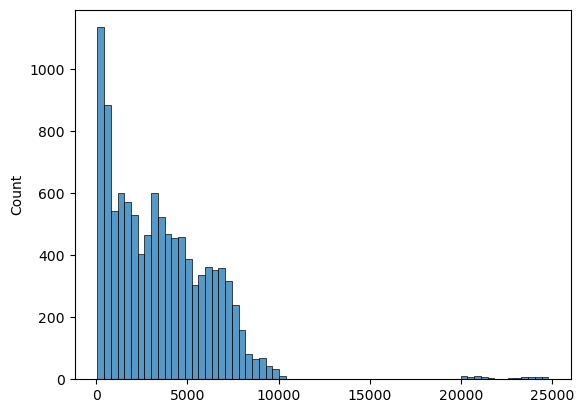

In [17]:
statistical_analysis (list(df['sum_pay']), q = [0.991, 0.992, 0.993, 0.994, 0.995])

In [18]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep=';')

In [19]:
df = df[df['sum_pay'] < 11000]

Среднее =  3431.4857010213555
Дисперсия =  6025391.552446647
Стандартное отклонение =  2454.6672997468813

Дециль  1.0  =  407.9000000000001
Нижний квартиль  =  1237.0
Дециль  3.0  =  1576.0
Дециль  4.0  =  2307.0
Медиана =  3154.5
Дециль  6.0  =  3897.7999999999993
Верхний квартиль  =  5275.5
Дециль  9.0  =  7011.0


(3431.4857010213555,
 6025391.552446647,
 2454.6672997468813,
 array([ 407.9, 1237. , 1576. , 2307. , 3154.5, 3897.8, 5275.5, 7011. ]))

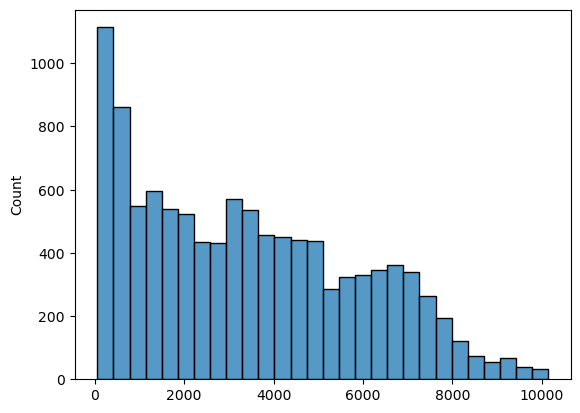

In [20]:
statistical_analysis (tuple(df['sum_pay']))

In [21]:
def show_hist (r1, r2, graph_title, xlabel = 'Платежи', ylabel = 'Люди'):
    
    sns.set(rc = {'figure.figsize':(10, 10)})
    sns.set_palette("pastel")
    
    ax1 = sns.histplot (r1, color = '#9ecae1', alpha  = 0.8, label = 'Группа А')
    ax2 = sns.histplot (r2, color = '#c994c7', alpha  = 0.6, label = 'Группа Б')
    ax1.set(xlabel = xlabel, ylabel = ylabel)
    
    plt.legend()
    plt.title(graph_title)
    plt.show()

In [22]:
df_control = df[df['id_group'] == 'control'] #### группа а

df_test = df[df['id_group'] == 'test'] #### группа б

In [23]:
df_test['sum_pay']

0        3288.0
3        7211.0
5         218.0
6        1295.0
8        4708.0
          ...  
10967    3371.0
10968    6590.0
10973     673.0
10974    1120.0
10975    5348.0
Name: sum_pay, Length: 5625, dtype: float64

In [24]:
df_control['sum_pay']

1        1267.0
2        4259.0
4         760.0
7        4008.0
9        4109.0
          ...  
10966    2704.0
10969    1818.0
10970    2055.0
10971     799.0
10972    4825.0
Name: sum_pay, Length: 5144, dtype: float64

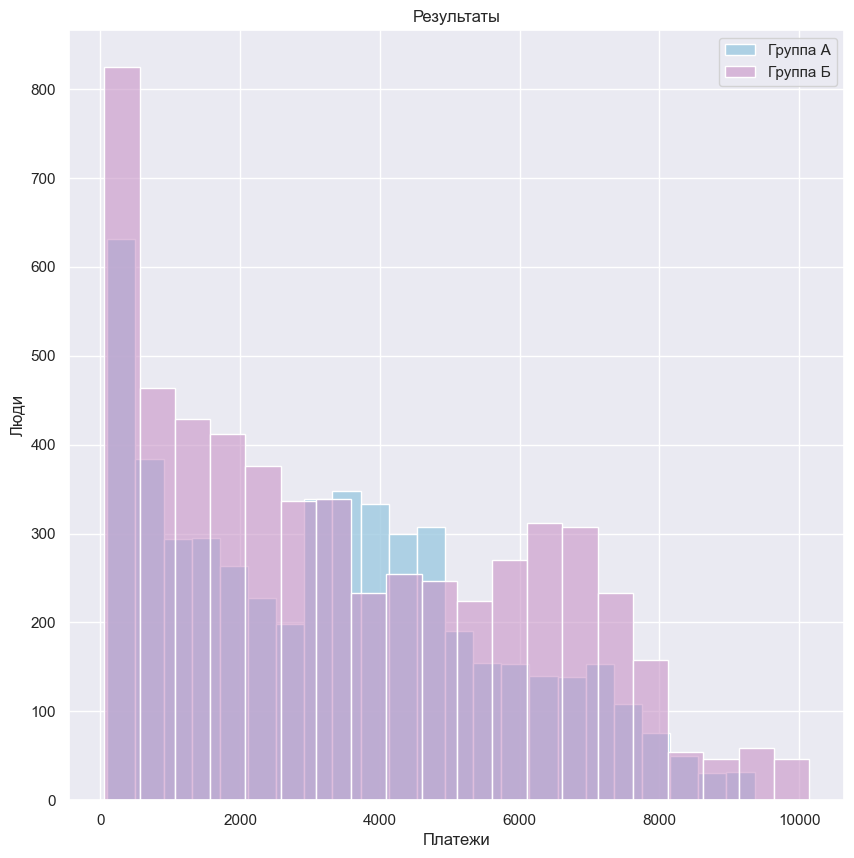

In [25]:
show_hist(df_control['sum_pay'], df_test['sum_pay'], 'Результаты')

In [26]:
test_calc(df_control['sum_pay'], df_test['sum_pay'])

Гипотеза не подтверждается
Среднее первого ряда =  3340.2869362363917
Среднее второго ряда =  3515.4764444444445
Разность средних =  -175.18950820805276

Значение стат. критерия =  -3.701794412626232
Значение p.value =  0.00021514838604285046


(-3.701794412626232, 0.00021514838604285046)

In [27]:
mann_whitney_func(df_control['sum_pay'], df_test['sum_pay'])

Распределения равны


(14162686.5, 0.05855868679637097)

#### Задача 2

In [28]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep=';')

In [29]:
df.dropna()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


Среднее =  3568.751036961932
Дисперсия =  8568292.495626044
Стандартное отклонение =  2927.164582941322

Дециль  1.0  =  nan
Нижний квартиль  =  nan
Дециль  3.0  =  nan
Дециль  4.0  =  nan
Медиана =  nan
Дециль  6.0  =  nan
Верхний квартиль  =  nan
Дециль  9.0  =  nan


(3568.751036961932,
 8568292.495626044,
 2927.164582941322,
 array([nan, nan, nan, nan, nan, nan, nan, nan]))

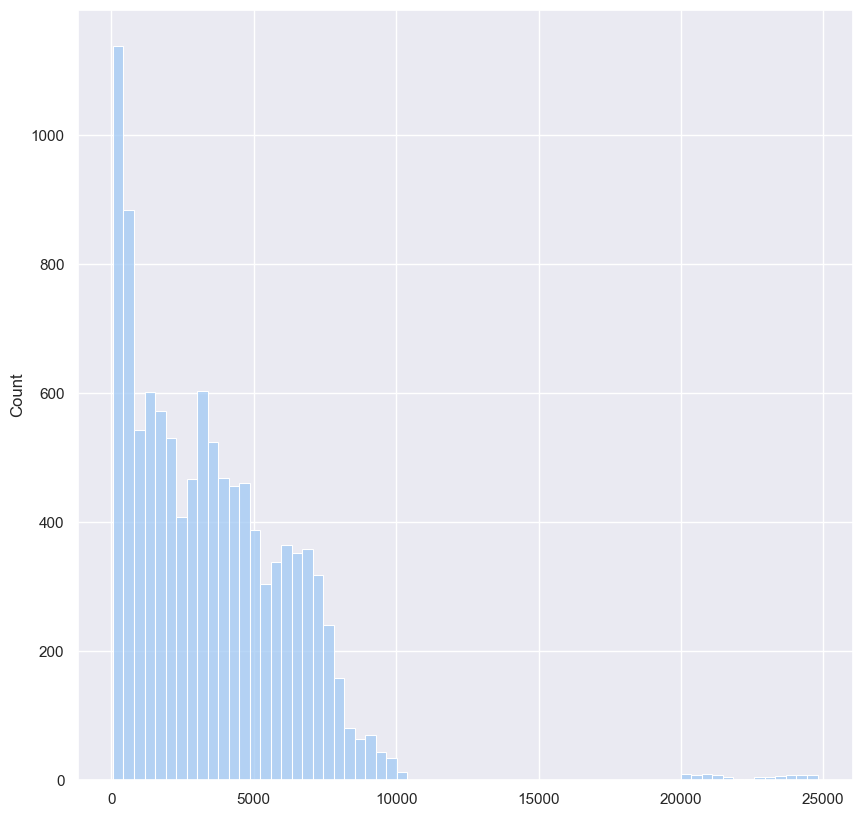

In [30]:
statistical_analysis (list(df['sum_pay']))

In [31]:
df = df[df['sum_pay'] < 11000] # - выбросы

Среднее =  3431.4857010213555
Дисперсия =  6025391.552446647
Стандартное отклонение =  2454.6672997468813

Дециль  1.0  =  407.9000000000001
Нижний квартиль  =  1237.0
Дециль  3.0  =  1576.0
Дециль  4.0  =  2307.0
Медиана =  3154.5
Дециль  6.0  =  3897.7999999999993
Верхний квартиль  =  5275.5
Дециль  9.0  =  7011.0


(3431.4857010213555,
 6025391.552446647,
 2454.6672997468813,
 array([ 407.9, 1237. , 1576. , 2307. , 3154.5, 3897.8, 5275.5, 7011. ]))

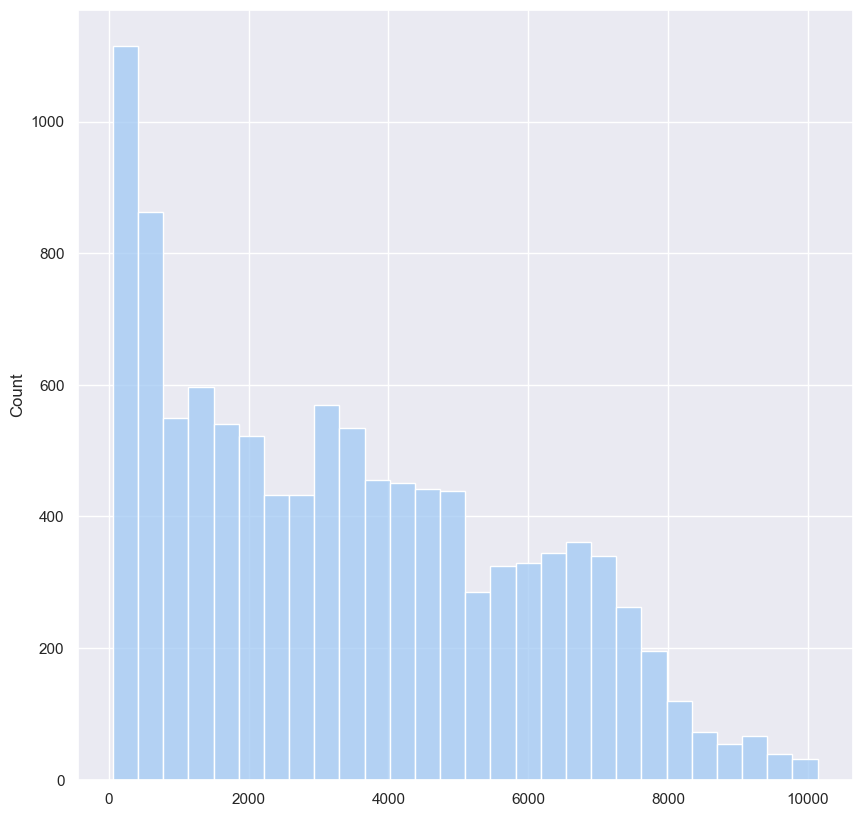

In [32]:
statistical_analysis (list(df['sum_pay']))

In [33]:
df['id_point'].unique()

array([1199., 1182., 1178., 1179., 1186., 1188.,   nan])

In [34]:
df = df[~df['id_point'].isnull()]

In [35]:
df['id_point'].unique()

array([1199., 1182., 1178., 1179., 1186., 1188.])

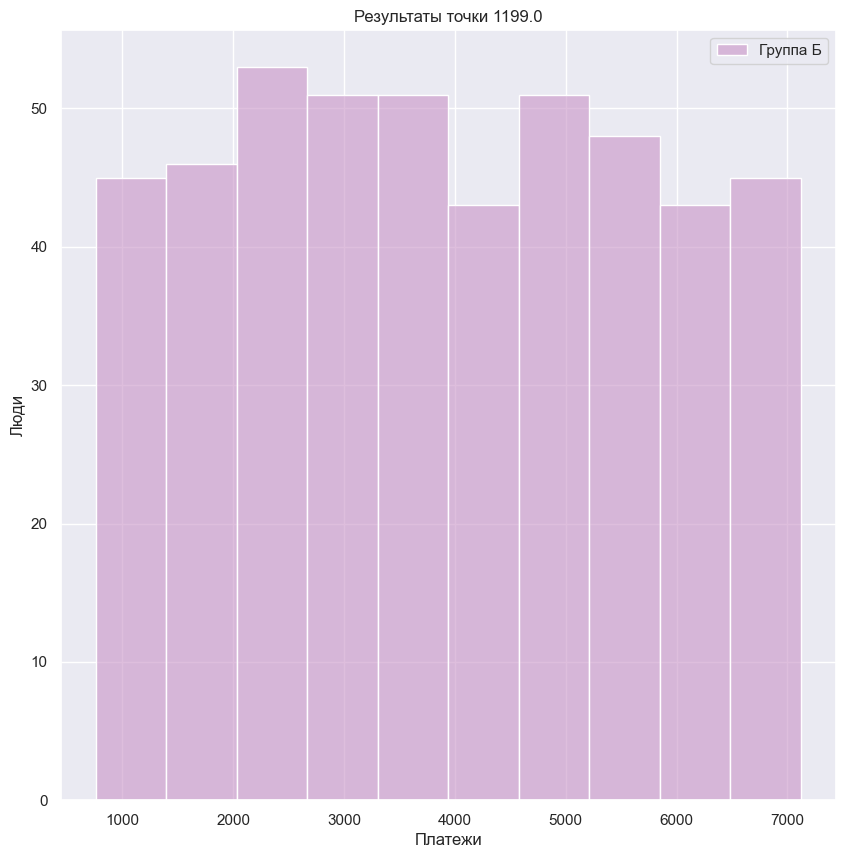

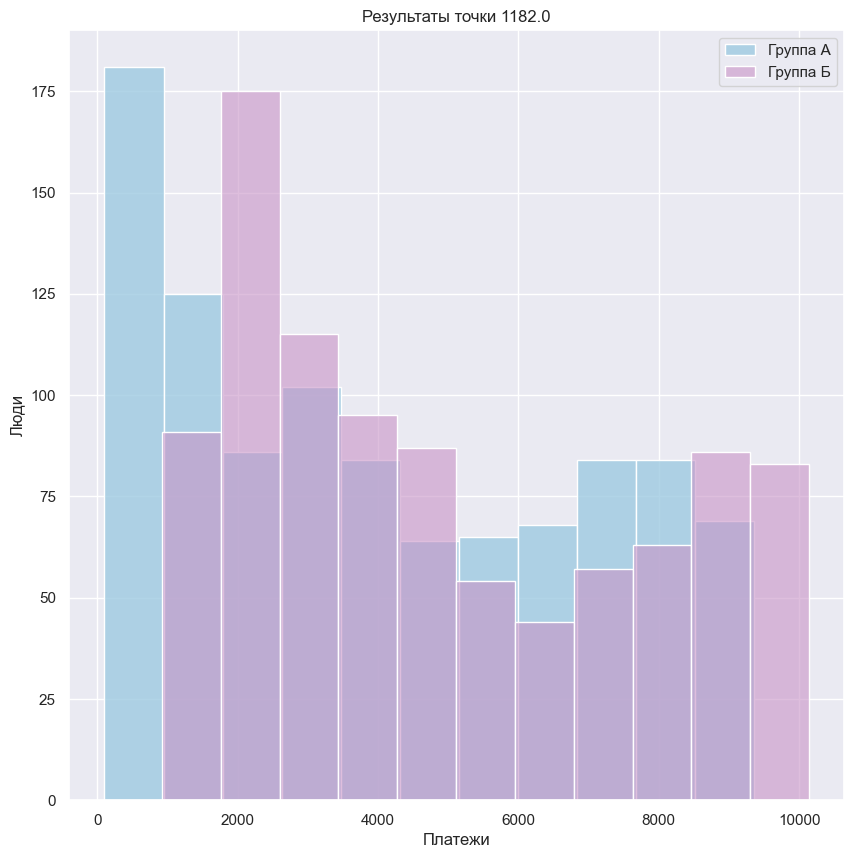

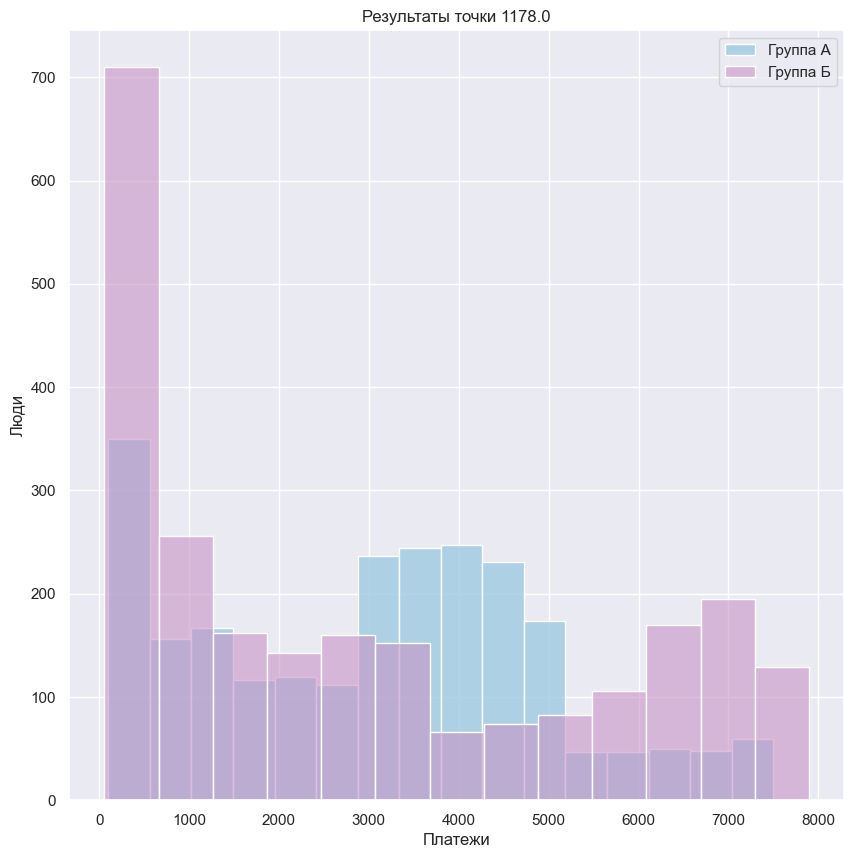

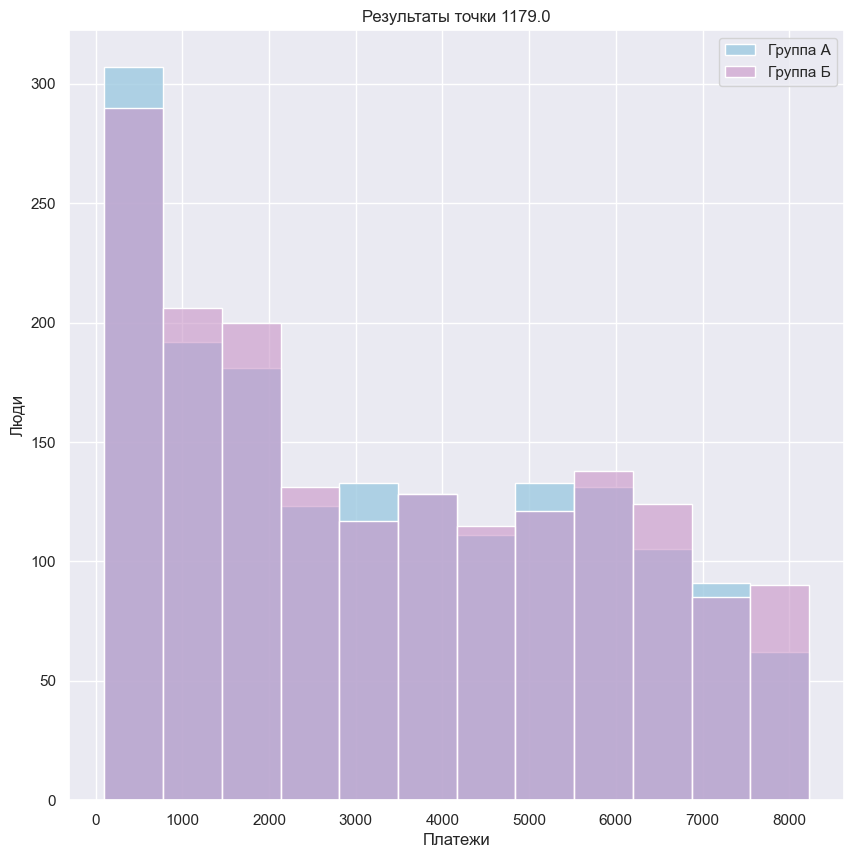

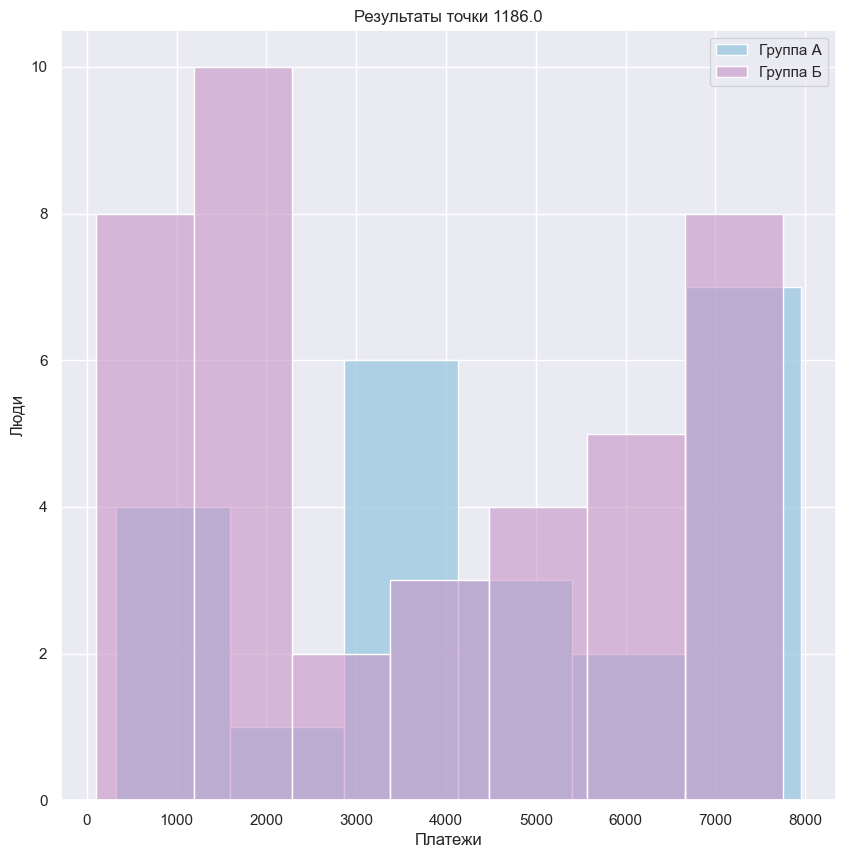

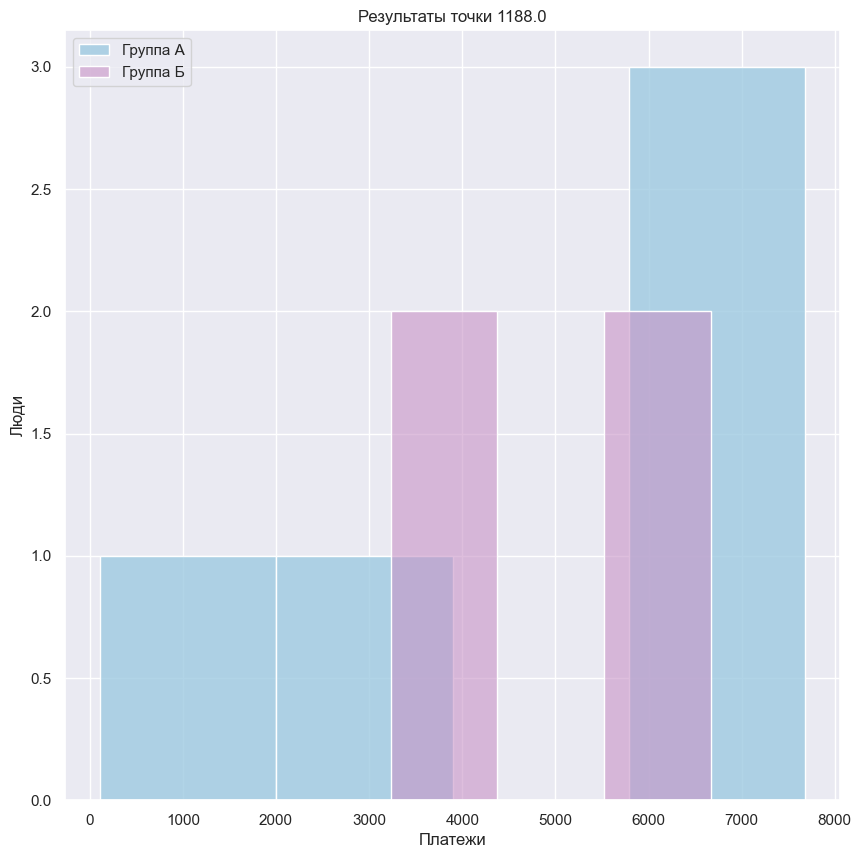

In [36]:
for i in df.id_point.unique():
    
    df_a = df_control[df_control['id_point'] == i]
    df_b = df_test[df_test['id_point'] == i]
    
    title = 'Результаты точки ' + str(i)
    
    show_hist(df_a['sum_pay'], df_b['sum_pay'], title)
    print() 

In [37]:
df = df[df['id_point'] != 1199.0] # точка не пригодна для анализа (нет б)
df = df[df['id_point'] != 1186.0] # точка не пригодна для анализа (мало наблюдений)
df = df[df['id_point'] != 1188.0] # точка не пригодна для анализа (мало наблюдений)

1182.0


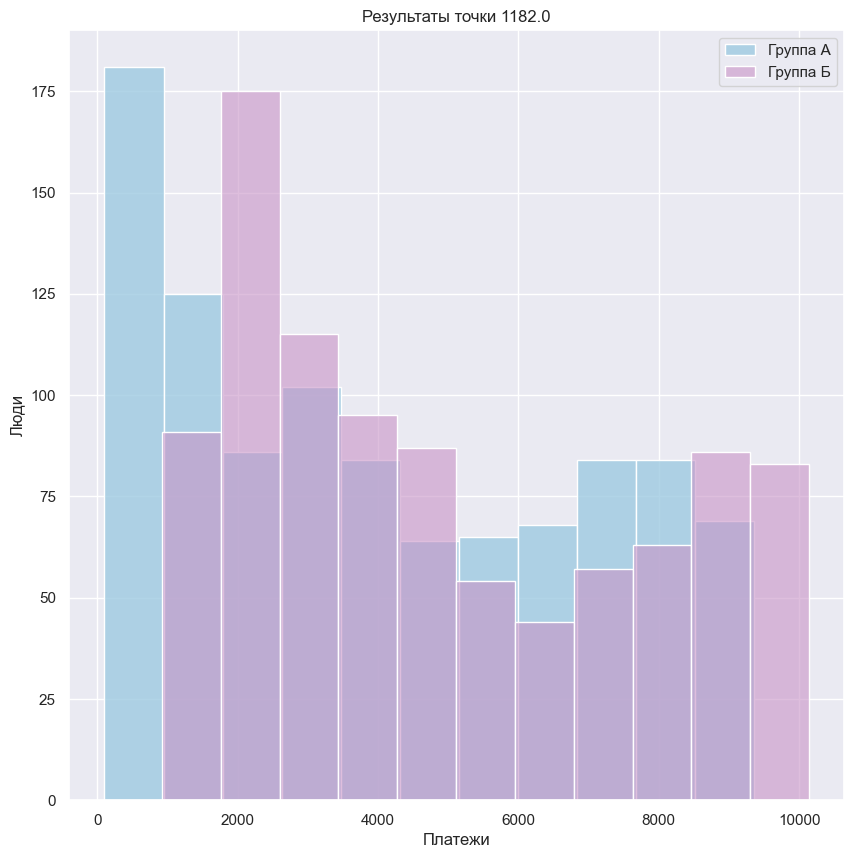


1178.0


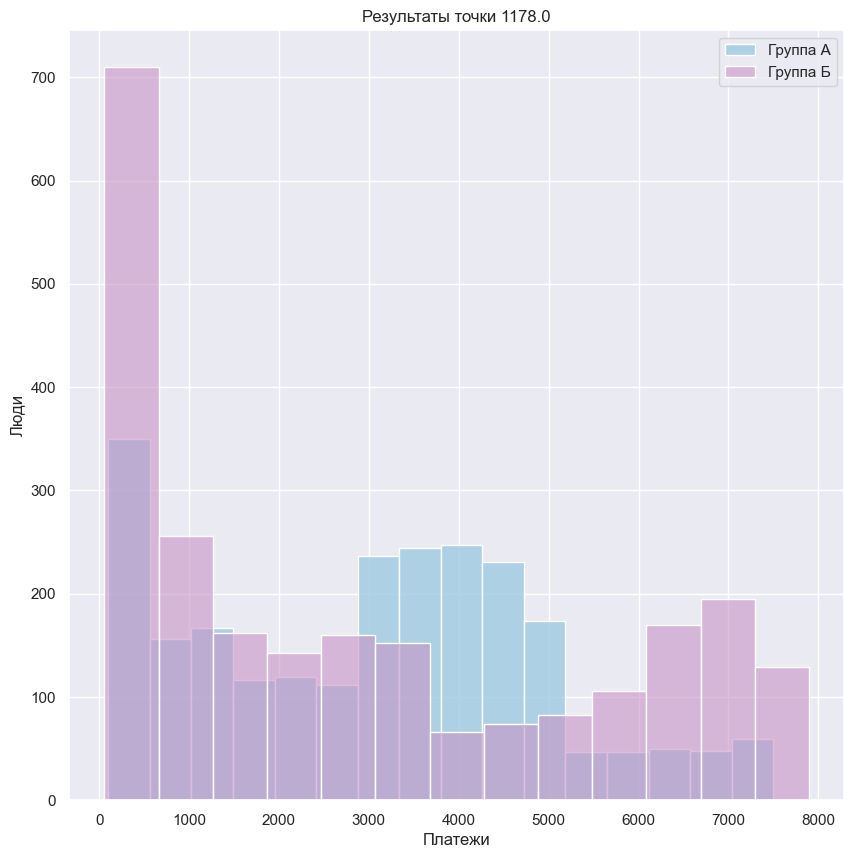


1179.0


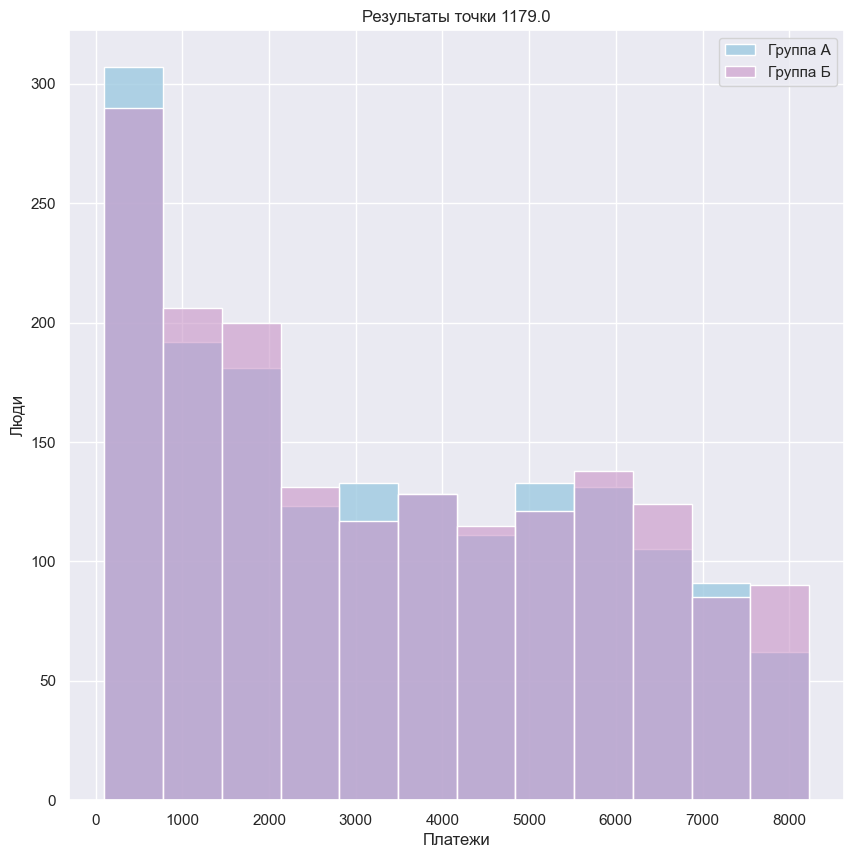

In [38]:
for i in df.id_point.unique():
    print(i)
    
    df_a = df_control[df_control['id_point'] == i]
    df_b = df_test[df_test['id_point'] == i]
    
    title = 'Результаты точки ' + str(i)
    
    show_hist(df_a['sum_pay'], df_b['sum_pay'], title)
    print()
    

In [39]:
df.reset_index()

,index,id_client,id_group,sum_pay,id_point,months_reg
0,1,1390221,control,1267.0,1182.0,11
1,2,1363404,control,4259.0,1178.0,2
2,3,1370042,test,7211.0,1179.0,3
3,4,1360376,control,760.0,1178.0,14
4,5,1371160,test,218.0,1179.0,5
...,...,...,...,...,...,...
10209,10971,1359021,control,799.0,1178.0,3
10210,10972,1363347,control,4825.0,1178.0,6
10211,10973,1373031,test,673.0,1179.0,1
10212,10974,1370292,test,1120.0,1179.0,1


In [40]:
for i in df.id_point.unique():
    print(i)
    
    df_a = df_control[df_control['id_point'] == i]
    df_b = df_test[df_test['id_point'] == i]
    
    print(test_calc(df_a['sum_pay'], df_b['sum_pay']))
    
    print()

1182.0
Гипотеза не подтверждается
Среднее первого ряда =  4036.9426877470355
Среднее второго ряда =  4945.12947368421
Разность средних =  -908.1867859371746

Значение стат. критерия =  -7.172588995409098
Значение p.value =  1.0387447468996453e-12
(-7.172588995409098, 1.0387447468996453e-12)

1178.0
Гипотеза подтверждается
Среднее первого ряда =  3036.214731585518
Среднее второго ряда =  2936.386949293433
Разность средних =  99.82778229208498

Значение стат. критерия =  1.5338932633911708
Значение p.value =  0.1251217226713009
(1.5338932633911708, 0.1251217226713009)

1179.0
Гипотеза подтверждается
Среднее первого ряда =  3331.3105480259283
Среднее второго ряда =  3421.826934097421
Разность средних =  -90.51638607149289

Значение стат. критерия =  -1.1225576641441302
Значение p.value =  0.2617037465196552
(-1.1225576641441302, 0.2617037465196552)



In [41]:
for i in df.id_point.unique():
    print(i)
    
    df_a = df_control[df_control['id_point'] == i]
    df_b = df_test[df_test['id_point'] == i]
    
    print(mann_whitney_func(df_a['sum_pay'], df_b['sum_pay']))
    
    print()

1182.0
Распределения не равны
(382818.5, 5.946812205351181e-15)

1178.0
Распределения не равны
(3122337.5, 1.5133330174771163e-06)

1179.0
Распределения равны
(1447666.5, 0.2580763851815786)



# Часть 3

### Задача 1

In [42]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [43]:
pearsonr(df['sum_pay'], df['months_reg'])

PearsonRResult(statistic=0.6040770871113641, pvalue=0.0)

In [44]:
spearmanr(df['sum_pay'], df['months_reg'])

SpearmanrResult(correlation=0.6572577535465227, pvalue=0.0)

C:\Users\NIO-7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


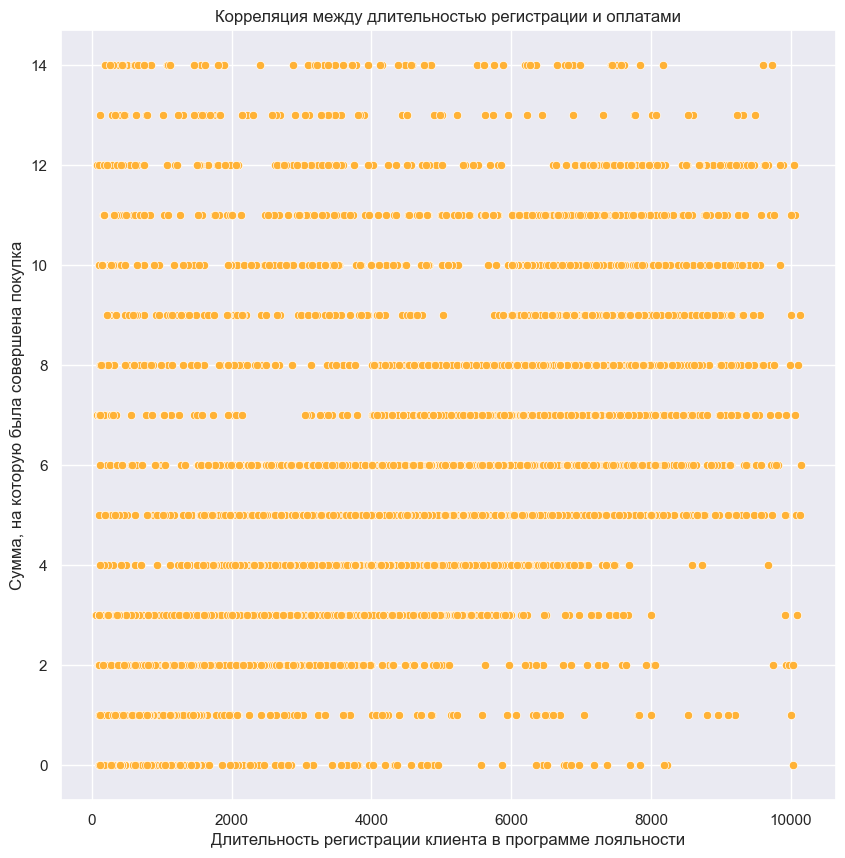

In [45]:

sns.scatterplot(df['sum_pay'], df['months_reg'], color = '#FFB236')
plt.title('Корреляция между длительностью регистрации и оплатами')
plt.xlabel('Длительность регистрации клиента в программе лояльности')
plt.ylabel('Сумма, на которую была совершена покупка')
plt.show()
